In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [13]:
df=pd.read_csv('Heart_Disease_Data.csv', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [14]:
df.columns =['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'] 
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,?,?,?,1
196,62,1,1,?,139,0,1,?,?,?,?,?,?,0
197,55,1,4,122,223,1,1,100,0,0,?,?,6,2
198,58,1,4,?,385,1,2,?,?,?,?,?,?,0


In [18]:
df = df.replace('\?+', np.nan, regex=True)
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,NaN,NaN,2
1,44,1,4,130,209,0,1,127,0,0,NaN,NaN,NaN,0
2,60,1,4,132,218,0,1,140,1,1.5,3,NaN,NaN,2
3,55,1,4,142,228,0,1,149,1,2.5,1,NaN,NaN,1
4,66,1,3,110,213,1,2,99,1,1.3,2,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,NaN,NaN,NaN,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,NaN,NaN,6,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [19]:
df.isnull().sum()

Age           0
Sex           0
cp            0
trestbps     56
chol          7
fbs           7
restecg       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       200 non-null    int64 
 1   Sex       200 non-null    int64 
 2   cp        200 non-null    int64 
 3   trestbps  144 non-null    object
 4   chol      193 non-null    object
 5   fbs       193 non-null    object
 6   restecg   200 non-null    int64 
 7   thalach   147 non-null    object
 8   exang     147 non-null    object
 9   oldpeak   144 non-null    object
 10  slope     98 non-null     object
 11  ca        2 non-null      object
 12  thal      34 non-null     object
 13  num       200 non-null    int64 
dtypes: int64(5), object(9)
memory usage: 22.0+ KB


In [22]:
df1=df.drop(['ca','thal','slope'],axis=1)   
df1

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140,260,0,1,112,1,3,2
1,44,1,4,130,209,0,1,127,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,2
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...
195,54,0,4,127,333,1,1,154,0,0,1
196,62,1,1,NaN,139,0,1,NaN,NaN,NaN,0
197,55,1,4,122,223,1,1,100,0,0,2
198,58,1,4,NaN,385,1,2,NaN,NaN,NaN,0


In [23]:
df1.isnull().sum()

Age          0
Sex          0
cp           0
trestbps    56
chol         7
fbs          7
restecg      0
thalach     53
exang       53
oldpeak     56
num          0
dtype: int64

In [37]:
df2=df1.dropna(subset = ['exang'])

In [38]:
df2

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140,260,0,1,112,1,3,2
1,44,1,4,130,209,0,1,127,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,2
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...
193,62,1,4,158,170,0,1,138,1,0,1
194,46,1,4,134,310,0,0,126,0,0,2
195,54,0,4,127,333,1,1,154,0,0,1
197,55,1,4,122,223,1,1,100,0,0,2


In [40]:
df2.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    3
chol        4
fbs         7
restecg     0
thalach     0
exang       0
oldpeak     3
num         0
dtype: int64

In [55]:
df2['oldpeak'] = df2['oldpeak'].fillna((df2['oldpeak'].median())) 
df2['chol'] = df2['chol'].fillna((df2['chol'].median())) 
df2['trestbps'] = df2['trestbps'].fillna((df2['trestbps'].median())) 

In [47]:
df2['fbs']=df2['fbs'].fillna((df2['fbs'].mode()[0]))

In [56]:
df2.isnull().sum()

Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
num         0
dtype: int64

In [105]:
df2

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,63,1,4,140,260,0,1,112,1,3,2
1,44,1,4,130,209,0,1,127,0,0,0
2,60,1,4,132,218,0,1,140,1,1.5,2
3,55,1,4,142,228,0,1,149,1,2.5,1
4,66,1,3,110,213,1,2,99,1,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...
193,62,1,4,158,170,0,1,138,1,0,1
194,46,1,4,134,310,0,0,126,0,0,2
195,54,0,4,127,333,1,1,154,0,0,1
197,55,1,4,122,223,1,1,100,0,0,2


In [106]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df3 = sc.fit_transform(df2) 
df3 = pd.DataFrame(df3,columns=df2.columns) 
df3

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,0.471069,0.187647,0.543227,0.297088,0.761941,-0.685565,0.405444,-0.492618,0.739844,1.535228,0.349113
1,-1.956412,0.187647,0.543227,-0.173515,0.315181,-0.685565,0.405444,0.191832,-1.351637,-1.213597,-1.333498
2,0.087782,0.187647,0.543227,-0.079394,0.394021,-0.685565,0.405444,0.785022,0.739844,0.160816,0.349113
3,-0.551029,0.187647,0.543227,0.391209,0.481621,-0.685565,0.405444,1.195692,0.739844,1.077090,-0.492193
4,0.854355,0.187647,-0.857727,-1.114720,0.350221,1.458650,1.859109,-1.085808,0.739844,-0.022439,-1.333498
...,...,...,...,...,...,...,...,...,...,...,...
142,0.343306,0.187647,0.543227,1.144173,-0.026459,-0.685565,0.405444,0.693762,0.739844,-1.213597,-0.492193
143,-1.700888,0.187647,0.543227,0.014726,1.199941,-0.685565,-1.048221,0.146202,-1.351637,-1.213597,0.349113
144,-0.678791,-5.329165,0.543227,-0.314696,1.401420,1.458650,0.405444,1.423842,-1.351637,-1.213597,-0.492193
145,-0.551029,0.187647,0.543227,-0.549997,0.437821,1.458650,0.405444,-1.040178,-1.351637,-1.213597,0.349113


In [107]:
collist=df3.columns.values
ncol=11
nrows=10 

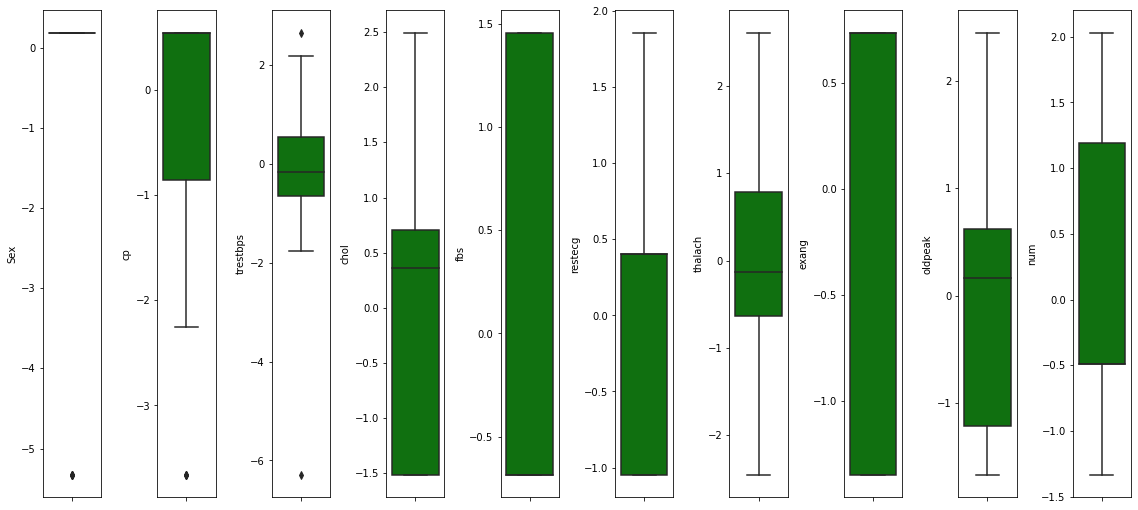

In [108]:
plt.figure(figsize=(17,70))           # Almost there are no Outliers (I am neglecting those as already due to missing values I have decreased 200 rows to 147 rows  )
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1) 
    sns.boxplot(df3[collist[i]],color='green',orient='v') 
    plt.tight_layout()

In [109]:
df3.skew() 

Age        -0.400521
Sex        -5.194676
cp         -1.990051
trestbps   -1.287217
chol       -0.518830
fbs         0.781077
restecg     0.430626
thalach     0.127674
exang      -0.618119
oldpeak     0.353640
num         0.262152
dtype: float64

In [110]:
import numpy as np                                            # Removing Skewness 
for col in df3.columns:
    if df3.skew().loc[col]>0.55:
        df3[col]=np.log1p(df3[col]) 

In [111]:
df3.skew()                                              # Skewness can not be removed

Age        -0.400521
Sex        -5.194676
cp         -1.990051
trestbps   -1.287217
chol       -0.518830
fbs         0.781077
restecg     0.430626
thalach     0.127674
exang      -0.618119
oldpeak     0.353640
num         0.262152
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212D8B42548>,
      dtype=object)

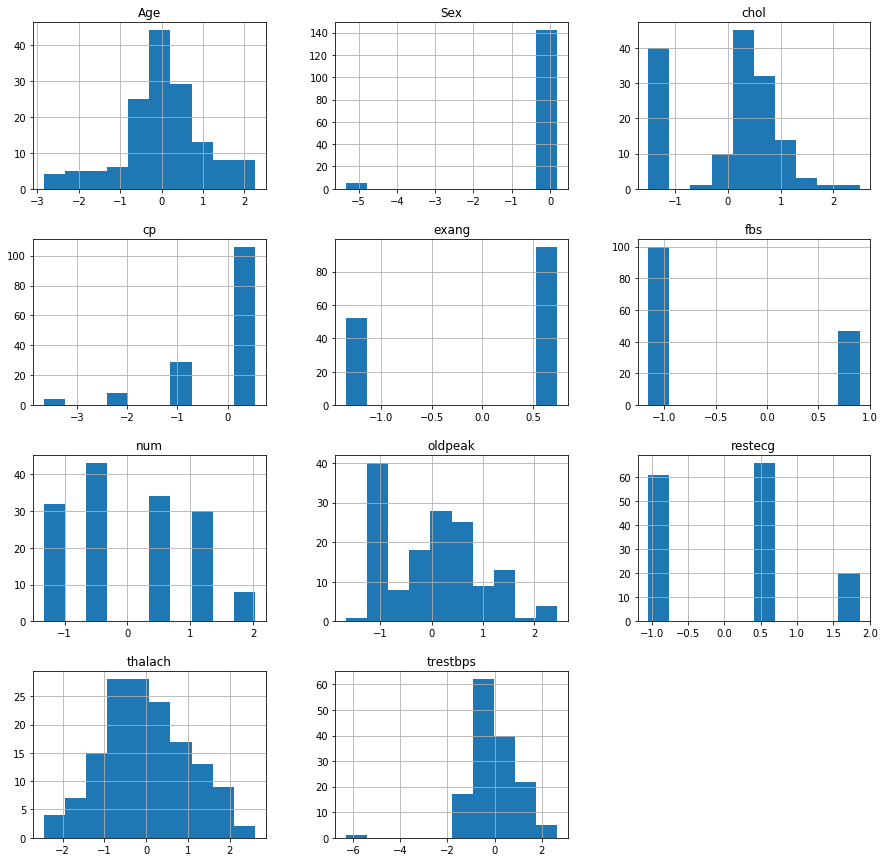

In [112]:
df3.hist(figsize=(15,15))   

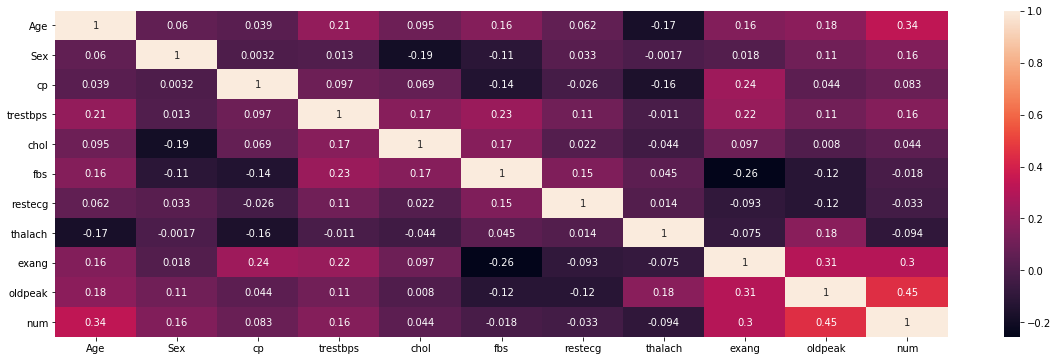

In [113]:
plt.figure(figsize=(20,6))
sns.heatmap(df3.corr(),annot=True)    

In [114]:
df3.corr()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
Age,1.000000,0.060245,0.038765,0.210168,0.094531,0.162679,0.061693,-0.174125,0.156823,0.181231,0.337881
Sex,0.060245,1.000000,0.003219,0.013132,-0.188673,-0.112769,0.033030,-0.001747,0.018155,0.107372,0.155506
cp,0.038765,0.003219,1.000000,0.096500,0.068889,-0.138458,-0.026294,-0.160306,0.235935,0.044499,0.082961
trestbps,0.210168,0.013132,0.096500,1.000000,0.174400,0.227699,0.106650,-0.011151,0.220104,0.111299,0.164809
chol,0.094531,-0.188673,0.068889,0.174400,1.000000,0.167138,0.022076,-0.043709,0.097098,0.007984,0.044482
fbs,0.162679,-0.112769,-0.138458,0.227699,0.167138,1.000000,0.150735,0.044988,-0.255473,-0.122306,-0.018366
restecg,0.061693,0.033030,-0.026294,0.106650,0.022076,0.150735,1.000000,0.014274,-0.093141,-0.122286,-0.033391
thalach,-0.174125,-0.001747,-0.160306,-0.011151,-0.043709,0.044988,0.014274,1.000000,-0.075057,0.178199,-0.094392
exang,0.156823,0.018155,0.235935,0.220104,0.097098,-0.255473,-0.093141,-0.075057,1.000000,0.307316,0.304296
oldpeak,0.181231,0.107372,0.044499,0.111299,0.007984,-0.122306,-0.122286,0.178199,0.307316,1.000000,0.447805


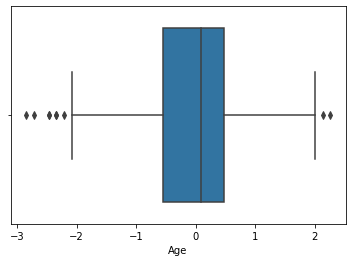

In [127]:
sns.boxplot(df3['Age']) 

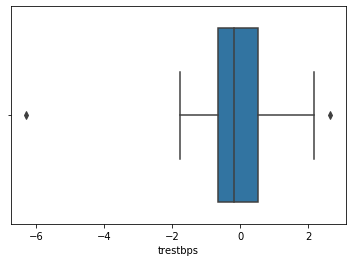

In [128]:
sns.boxplot(df3['trestbps']) 

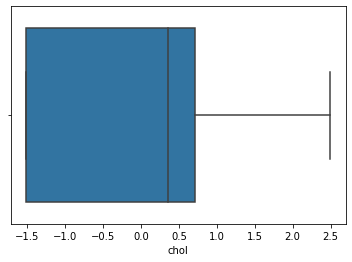

In [131]:
sns.boxplot(df3['chol']) 

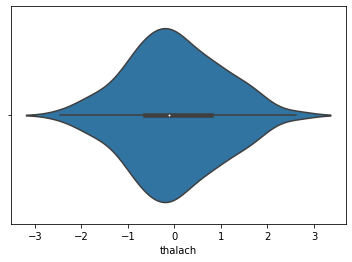

In [135]:
sns.violinplot(df3['thalach']) 

{'bodies': [<matplotlib.collections.PolyCollection at 0x212db59bf88>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x212db59bb48>,
 'cmins': <matplotlib.collections.LineCollection at 0x212db5a7988>,
 'cbars': <matplotlib.collections.LineCollection at 0x212db59bd48>}

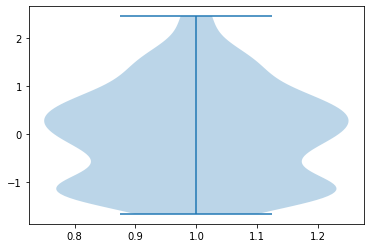

In [134]:
plt.violinplot(df3['oldpeak']) 

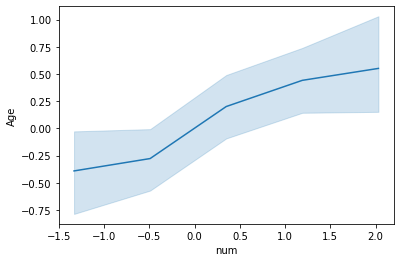

In [116]:
sns.lineplot(x='num', y='Age', data=df3) 

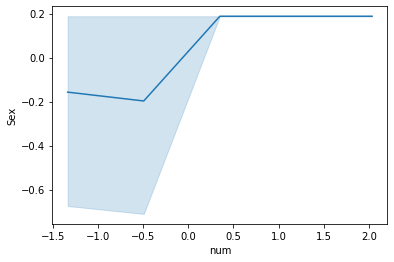

In [117]:
sns.lineplot(x='num', y='Sex', data=df3) 

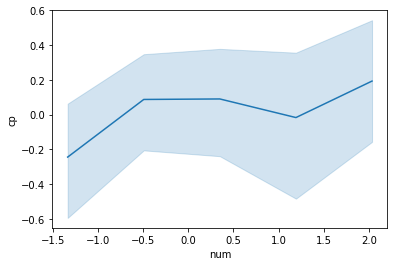

In [118]:
sns.lineplot(x='num', y='cp', data=df3) 

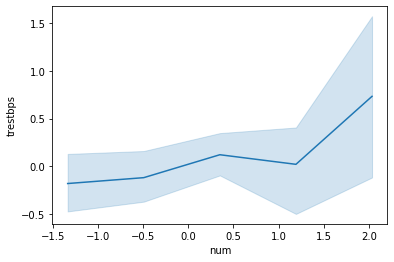

In [119]:
sns.lineplot(x='num', y='trestbps', data=df3) 

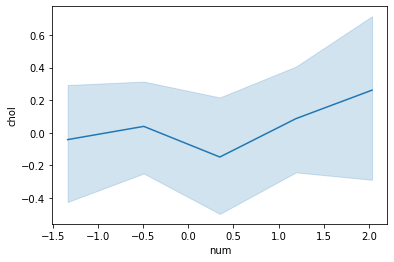

In [120]:
sns.lineplot(x='num', y='chol', data=df3) 

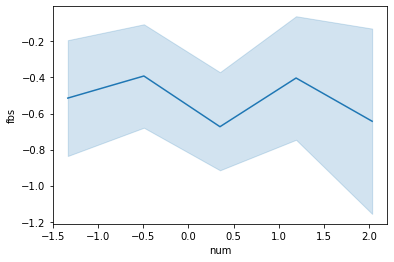

In [121]:
sns.lineplot(x='num', y='fbs', data=df3) 

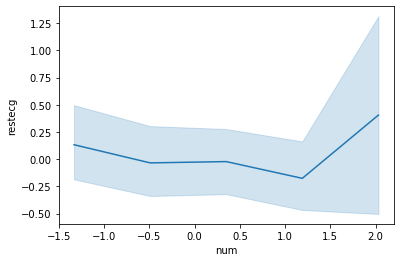

In [123]:
sns.lineplot(x='num', y='restecg', data=df3) 

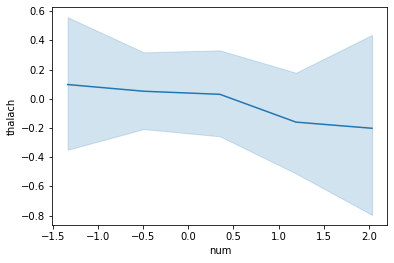

In [124]:
  sns.lineplot(x='num', y='thalach', data=df3) 

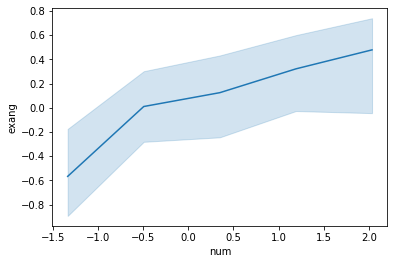

In [125]:
sns.lineplot(x='num', y='exang', data=df3) 

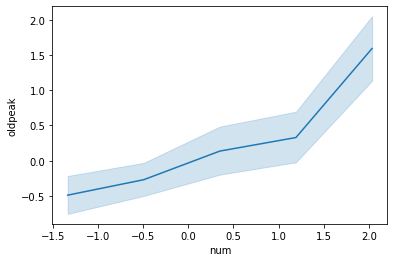

In [126]:
sns.lineplot(x='num', y='oldpeak', data=df3) 

In [136]:
x=df3.drop('num',axis=1)
x.head() 

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak
0,0.471069,0.187647,0.543227,0.297088,0.761941,-1.156979,0.405444,-0.492618,0.739844,1.535228
1,-1.956412,0.187647,0.543227,-0.173515,0.315181,-1.156979,0.405444,0.191832,-1.351637,-1.213597
2,0.087782,0.187647,0.543227,-0.079394,0.394021,-1.156979,0.405444,0.785022,0.739844,0.160816
3,-0.551029,0.187647,0.543227,0.391209,0.481621,-1.156979,0.405444,1.195692,0.739844,1.077090
4,0.854355,0.187647,-0.857727,-1.114720,0.350221,0.899612,1.859109,-1.085808,0.739844,-0.022439


In [137]:
y=pd.DataFrame(df3.num)
y.head()

,num
0,0.349113
1,-1.333498
2,0.349113
3,-0.492193
4,-1.333498


In [159]:
print(y['num'].unique()) 

[ 0.34911333 -1.33349846 -0.49219257  1.19041923  2.03172512]


In [161]:
from sklearn.preprocessing import LabelEncoder          
lb=LabelEncoder()
y['num']=pd.DataFrame(lb.fit_transform(y['num']))
y

,num
0,2
1,0
2,2
3,1
4,0
...,...
142,1
143,2
144,1
145,2


In [162]:
print(y['num'].unique()) 

[2 0 1 3 4]


In [163]:
print(x.shape)
print(y.shape)

(147, 10)
(147, 1)


# Importing Necessary Libraries

In [245]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [246]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [241]:
#max_acc_score=0
#for i in range(42,101):
   # r_state=i
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=8,test_size=0.1)


In [242]:
print(train_x.shape,test_x.shape)

(132, 10) (15, 10)


In [238]:
print(train_y.shape,test_y.shape)

(144, 1) (3, 1)


In [220]:
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parameters={ 'criterion':['gini','entropy']}
gd=GridSearchCV(rfc,parameters,cv=5)
gd.fit(train_x,train_y)
gd.best_params_
#'n_estimator':[10,50,100,150],

{'criterion': 'gini'}

In [230]:
from sklearn.model_selection import GridSearchCV
kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(kn,parameters,cv=5)
gd.fit(train_x,train_y)
gd.best_params_

{'n_neighbors': 1}

In [248]:
from sklearn.model_selection import GridSearchCV
parameters={"kernel":('linear','rbf','poly'), 'C':[1,10]}
sv=SVC()
gd = GridSearchCV(sv,parameters, cv=5)
gd.fit(train_x,train_y)
gd.best_params_

{'C': 10, 'kernel': 'rbf'}

In [173]:
from sklearn.model_selection import GridSearchCV
parameters={"criterion":('gini','entropy')}
dt=DecisionTreeClassifier()
gd = GridSearchCV(dt,parameters, cv=5)
gd.fit(train_x,train_y)
gd.best_params_

{'criterion': 'entropy'}

In [240]:
kn=KNeighborsClassifier(n_neighbors=1) 
#r_state=maxr2_score(knr,x,y) 
model.fit(train_x,train_y)
pre=model.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for KNeighborsClassifier= ',AS)



Accuracy_score for KNeighborsClassifier=  0.0


In [224]:
sv=SVC(C=10,kernel='linear') 
#r_state=maxr2_score(knr,x,y) 
model.fit(train_x,train_y)
pre=model.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for SVC= ',AS)

Accuracy_score for SVC=  0.3050847457627119


In [217]:
dt=DecisionTreeClassifier(criterion='entropy') 
#r_state=maxr2_score(knr,x,y) 
model.fit(train_x,train_y)
pre=model.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for DTC= ',AS)

Accuracy_score for DTC=  0.3050847457627119


In [216]:
mnb=MultinomialNB()
#r_state=maxr2_score(knr,x,y) 
model.fit(train_x,train_y)
pre=model.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for MNB= ',AS)

Accuracy_score for MNB=  0.3220338983050847


In [222]:
rfc=RandomForestClassifier(criterion='entropy') 
#r_state=maxr2_score(knr,x,y) 
model.fit(train_x,train_y)
pre=model.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for rfc= ',AS)

Accuracy_score for rfc=  0.3220338983050847


In [243]:
gbc=GradientBoostingClassifier() 
#r_state=maxr2_score(knr,x,y) 
gbc.fit(train_x,train_y)
pre=gbc.predict(test_x)
AS=accuracy_score(test_y,pre)
print('Accuracy_score for rfc= ',AS)

Accuracy_score for rfc=  0.13333333333333333


In [247]:
xgb=XGBClassifier(alpha=0, max_depth=6)#base_estimator=lor,learning_rate=0.01,n_estimators=1000,algorithm='SAMME.R')
#r_state=maxr2_score(knr,x,y) 
xgb.fit(train_x,train_y)
pre=xgb.predict(test_x) 
AS=accuracy_score(test_y,pre)
print('Accuracy_score for xgb= ',AS)

Accuracy_score for xgb=  0.2


In [ ]:
#Here RandomForestClassifier is working best so I am saving the model 

In [250]:
from sklearn.externals import joblib
joblib.dump(rfc, 'rfc_heart_disease.pkl')

['rfc_heart_disease.pkl']